In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import IsolationForest
%matplotlib inline

In [ ]:
#Read Isolation dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Isolation_data.csv')
df

,Frozen,Delicassen
0,214,1338
1,1762,1776
2,2405,7844
3,6404,1788
4,3915,5185
...,...,...
435,13135,2204
436,4510,2346
437,437,1867
438,1038,2125


In [3]:
df.describe()

,Frozen,Delicassen
count,440.000000,440.000000
mean,3071.931818,1524.870455
std,4854.673333,2820.105937
min,25.000000,3.000000
25%,742.250000,408.250000
50%,1526.000000,965.500000
75%,3554.250000,1820.250000
max,60869.000000,47943.000000


<Axes: >

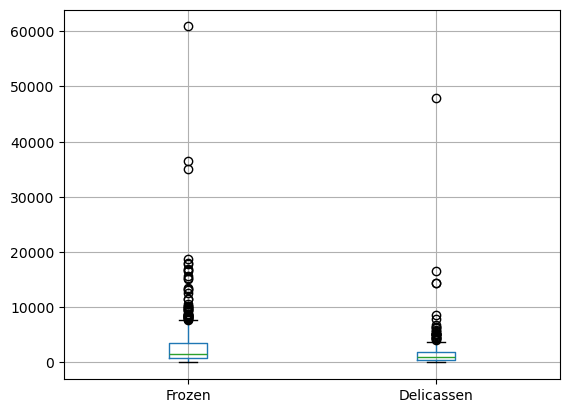

In [4]:
df.boxplot()

In [5]:
iso = IsolationForest()

iso.fit(df)
ypred = iso.predict(df)
ypred

array([ 1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1

In [6]:
len(ypred)

440

<Axes: xlabel='Frozen', ylabel='Delicassen'>

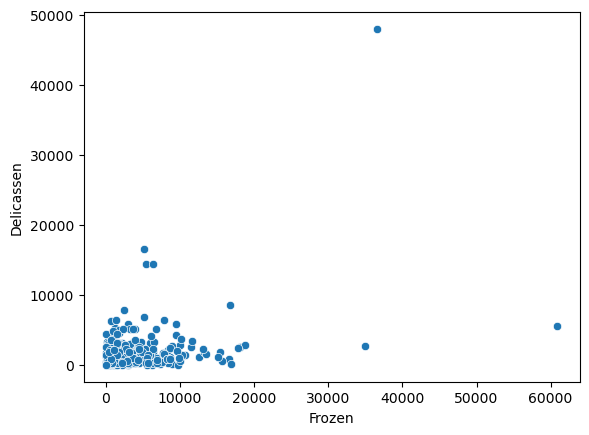

In [7]:
sns.scatterplot(x = df['Frozen'],y = df['Delicassen'])

In [8]:
df['Outliers'] = ypred

df

,Frozen,Delicassen,Outliers
0,214,1338,1
1,1762,1776,1
2,2405,7844,-1
3,6404,1788,1
4,3915,5185,-1
...,...,...,...
435,13135,2204,-1
436,4510,2346,1
437,437,1867,1
438,1038,2125,1


In [9]:
data = df[df['Outliers'] == 1]
data

,Frozen,Delicassen,Outliers
0,214,1338,1
1,1762,1776,1
3,6404,1788,1
5,666,1451,1
6,480,545,1
...,...,...,...
434,688,838,1
436,4510,2346,1
437,437,1867,1
438,1038,2125,1


In [10]:
df

,Frozen,Delicassen,Outliers
0,214,1338,1
1,1762,1776,1
2,2405,7844,-1
3,6404,1788,1
4,3915,5185,-1
...,...,...,...
435,13135,2204,-1
436,4510,2346,1
437,437,1867,1
438,1038,2125,1


# PPS

In [ ]:
# !pip install ppscore

In [11]:
import ppscore as ps

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Iris.csv',
                index_col=0)
df/

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [13]:
ps.score(df, x='SepalLengthCm',y = 'Species')

{'x': 'SepalLengthCm',
 'y': 'Species',
 'ppscore': 0.47164941668027915,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.35333333333333333,
 'model_score': 0.6583332894532472,
 'model': DecisionTreeClassifier()}

In [15]:
feature_sel = ps.matrix(df)

In [16]:
feature_sel

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,SepalLengthCm,SepalLengthCm,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,SepalLengthCm,SepalWidthCm,0.000000,regression,True,mean absolute error,0.327333,0.362073,DecisionTreeRegressor()
2,SepalLengthCm,PetalLengthCm,0.550575,regression,True,mean absolute error,1.488000,0.668745,DecisionTreeRegressor()
3,SepalLengthCm,PetalWidthCm,0.431163,regression,True,mean absolute error,0.645333,0.367090,DecisionTreeRegressor()
4,SepalLengthCm,Species,0.471649,classification,True,weighted F1,0.353333,0.658333,DecisionTreeClassifier()
5,SepalWidthCm,SepalLengthCm,0.001902,regression,True,mean absolute error,0.684667,0.683364,DecisionTreeRegressor()
6,SepalWidthCm,SepalWidthCm,1.000000,predict_itself,True,None,0.000000,1.000000,None
7,SepalWidthCm,PetalLengthCm,0.167773,regression,True,mean absolute error,1.488000,1.238354,DecisionTreeRegressor()
8,SepalWidthCm,PetalWidthCm,0.129681,regression,True,mean absolute error,0.645333,0.561646,DecisionTreeRegressor()
9,SepalWidthCm,Species,0.179145,classification,True,weighted F1,0.353333,0.469180,DecisionTreeClassifier()


In [17]:
feature_sel[feature_sel['y'] == 'Species']

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
4,SepalLengthCm,Species,0.471649,classification,True,weighted F1,0.353333,0.658333,DecisionTreeClassifier()
9,SepalWidthCm,Species,0.179145,classification,True,weighted F1,0.353333,0.469180,DecisionTreeClassifier()
14,PetalLengthCm,Species,0.884812,classification,True,weighted F1,0.353333,0.925512,DecisionTreeClassifier()
19,PetalWidthCm,Species,0.927652,classification,True,weighted F1,0.353333,0.953215,DecisionTreeClassifier()
24,Species,Species,1.000000,predict_itself,True,None,0.000000,1.000000,None
